## Метод K ближайших соседей (K nearest neighbours, KNN)
**Идея:** делать предсказание на основе меток ближайших соседей

<center>
**Важные параметры (SkLearn):** 
</center>

| Параметр (SkLearn) | Параметр (лекция) | Описание                       |
|--------------------|-------------------|--------------------------------|
| n_neighbors       | K                 | Число соседей                  |
| weights            | $\gamma$          | "заряды", веса соседей         |
| metric             | K + $\rho$        | "Потенциал", ядро + расстояние |


<center>
**Формула:**
</center>

$$a(x, X^l) = sign(\Sigma_{i=1}^lw_iy_i\rho(x,x_i)))$$


![](https://kevinzakka.github.io/assets/1nearestneigh.png)
![](https://kevinzakka.github.io/assets/20nearestneigh.png)

# 1. Классификация

## 1.1. Загрузка данных
Давайте загрузим данные Ириса Фишера
![](https://kevinzakka.github.io/assets/flower.jpg)

In [1]:
# !pip install seaborn 
# если seaborn не импортируется, установите его этой командой (либо без "!" в командной строке, либо)
import seaborn as sns # библиотека для визуализации
df = sns.load_dataset("iris") # в seaborn и sklearn iris dataset идёт из коробки

## 1.2. Визуализация
Seaborn - отличный инструмент визуализации с большой [галереей](http://seaborn.pydata.org/examples/index.html) примеров

In [2]:
# df.head(100) # первые 100 строк
df.head() # выведем первые 5 строк таблицы

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


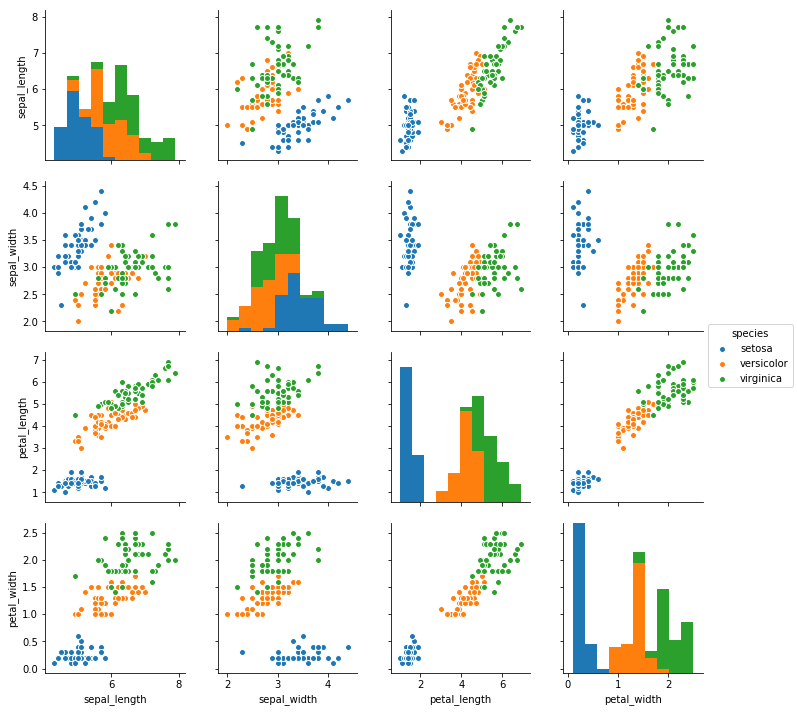

In [3]:
%matplotlib inline 
# %matplotlib inline - директива jupyter, которая позволяет рисовать графики в jupyter notebook
sns.pairplot(df, 'species') # диагональные элементы - гистограммы

## 1.3. Обучение модели
Давайте обучим модель и посмотрим на её качество. Запустите код несколько раз!

In [4]:
X = df.drop('species', 1) # возьмём в качестве объектов и признаков всё кроме колонки "species" (вид, разновидность цвета). 
# Метод .drop() выкидывает колонку "species". Если бы было .drop('species', 0), то выкинулась бы строка "species" 
y = df['species'] # в качестве целевой переменной возьмём вид цветка ("species")

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

clf = KNeighborsClassifier() # инициализируем классификатор с начальными параметрами. Сейчас классификатор не обучен
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # разобьём выборку на обучающую и на тестовую (80% данных на обучение)
clf.fit(X_train, y_train) # обучим классификатор, указав ему, какие объекты (X) какие метки классов (y) имеют. Иными словами, какое значение y соответствует каждому объекту из X
y_pred = clf.predict(X_test) # получим предсказания обученного классификатора для тестовой выборки

Посмотрим на предсказания

In [11]:
print('\n'.join(['Real: {}, Predicted: {}'.format(y_2, y_1) for y_1, y_2 in zip(y_pred, y_test)]))

Real: virginica, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: versicolor
Real: versicolor, Predicted: virginica
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: virginica, Predicted: virginica
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: versicolor, Predicted: versicolor
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: setosa, Predicted: setosa
Real: virginica, Predicted: virginica
Real: setosa, Predicted: setosa
Real: virginica, Predict

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # доля правильных ответов

0.9

Какой вывод можно сделать из результатов?

## 1.4. Подбор параметров
В упражнении выше вы могли увидеть, как "скачет" качество алгоритма от раза к разу. Давайте посмотрим более правильный подход оценки качества, который поможет нам подобрать наилучшие гиперпараметры модели и оценить её качество. Этот подход называется кросс-валидацией
![](https://kevinzakka.github.io/assets/k_fold_cv.jpg)
Как он работает? Всё просто! Мы бьём наши прецеденты (пару x,y) случайным образом на K частей, далее на K - 1 части обучаемся, на 1 - тестируем. Делаем так поочерёдно для всех K частей, поочерёдно выкидывая каждую из обучающей выборки и тестируя алгоритм на ней, и усредняем результат. Таким образом можно более стабильно оценивать качество моделей и подбирать для неё наилучшие гиперпараметры

## 1.4.1. Посмотрим, как меняется качество от числа соседей
Попробуем поварьировать количество ближайших соседей

c:\users\artem\anaconda3\envs\lasagne2.7\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


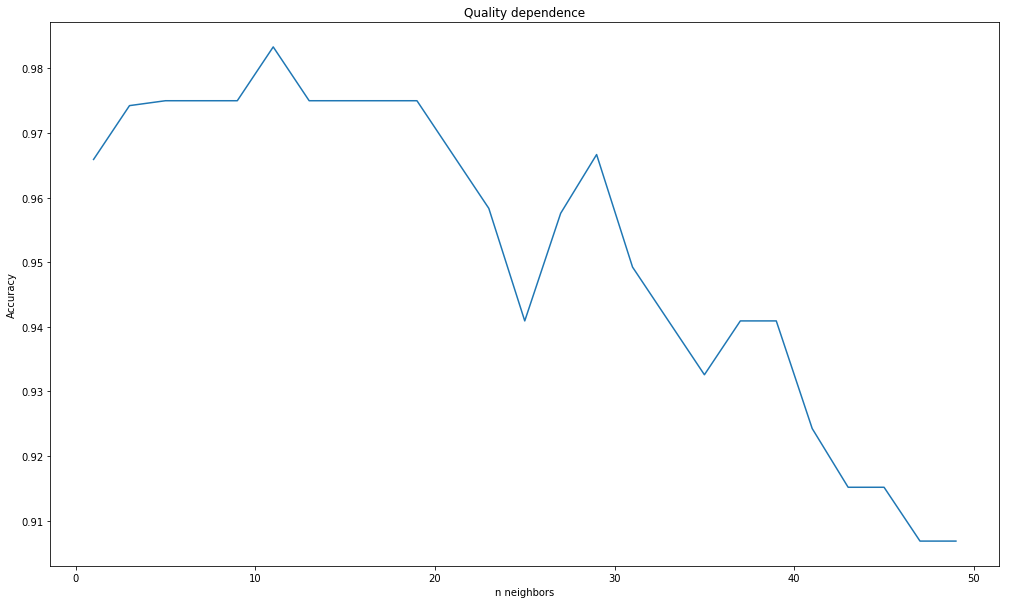

In [13]:
from sklearn.cross_validation import cross_val_score

neighbors = range(1,50,2) # 

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k) # необученный классификатор с числом соседей = k
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy') 
    # cross_val_score - разобьёт данные
    # cv - K из иллюстрации выше, scoring - метрика (можно задавать свою)
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt # подключение библиотеки для отрисовки графиков
plt.figure(figsize=(17,10)) # сделаем график большим
plt.title('Quality dependence') # зададим заголовок к графику
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.plot(neighbors, cv_scores) # отрисуем график

А как же подобрать наилучшие параметры, особенно если их много? Можно, конечно, вручную запускать при каждых параметрах cross-validation, но в SkLearn всё уже сделано за вас!

In [14]:
from sklearn.grid_search import GridSearchCV
# здесь можно задать диапазон значений для параметров, которые мы хотим подобрать. 
# ЗАДАНИЕ! Подберите наилучшие на ваш взгляд параметры для данного классификатора (n_neighbors, weights, metric из описания выше. Подробнее смотрите здесь http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

# РЕШЕНИЕ! Идём сюды http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
params_grid = { 
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3, 5, 10]
}
gs = GridSearchCV(clf, params_grid, cv=5, verbose=2, scoring='accuracy') # Просто передаёте ему свой классификатор и он сам подберёт для него лучшие гиперпараметры! cv=K, где K - количество сплитов. verbose=0 - не выводить никакой информации, verbose > 0 - выводить больше информации (тем больше, чем больше verbose). scoring - метрика (можно передавать свою)
gs.fit(X_train, y_train)

c:\users\artem\anaconda3\envs\lasagne2.7\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1960 candidates, totalling 9800 fits
[CV] n_neighbors=1, weights=uniform, algorithm=auto, p=1 .............
[CV] .... n_neighbors=1, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=auto, p=1 .............
[CV] .... n_neighbors=1, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=auto, p=1 .............
[CV] .... n_neighbors=1, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=auto, p=1 .............
[CV] .... n_neighbors=1, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=auto, p=1 .............
[CV] .... n_neighbors=1, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=1, weights=distance, algorithm=auto, p=1 ............
[CV] ... n_neighbors=1, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=1, weights=distance, algorithm=auto, p=1 ............
[CV] ... n_n

[CV] .... n_neighbors=2, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=auto, p=3 .............
[CV] .... n_neighbors=2, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=auto, p=3 .............
[CV] .... n_neighbors=2, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=auto, p=3 .............
[CV] .... n_neighbors=2, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=auto, p=3 .............
[CV] .... n_neighbors=2, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=auto, p=3 ............
[CV] ... n_neighbors=2, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=auto, p=3 ............
[CV] ... n_neighbors=2, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=auto, p=3 ............
[CV] .

[CV] n_neighbors=3, weights=uniform, algorithm=auto, p=10 ............
[CV] ... n_neighbors=3, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=auto, p=10 ............
[CV] ... n_neighbors=3, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=auto, p=10 ............
[CV] ... n_neighbors=3, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=auto, p=10 ............
[CV] ... n_neighbors=3, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=auto, p=10 ............
[CV] ... n_neighbors=3, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=3, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=3, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n

[CV] .... n_neighbors=5, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=auto, p=3 .............
[CV] .... n_neighbors=5, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=auto, p=3 .............
[CV] .... n_neighbors=5, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=auto, p=3 ............
[CV] ... n_neighbors=5, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=auto, p=3 ............
[CV] ... n_neighbors=5, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=auto, p=3 ............
[CV] ... n_neighbors=5, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=auto, p=3 ............
[CV] ... n_neighbors=5, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=auto, p=3 ............
[CV] .

[CV] ... n_neighbors=7, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=auto, p=1 ............
[CV] ... n_neighbors=7, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=auto, p=1 ............
[CV] ... n_neighbors=7, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=auto, p=1 ............
[CV] ... n_neighbors=7, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=auto, p=1 ............
[CV] ... n_neighbors=7, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=auto, p=2 .............
[CV] .... n_neighbors=7, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=auto, p=2 .............
[CV] .... n_neighbors=7, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=auto, p=2 .............
[CV] .

[CV] .... n_neighbors=8, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=auto, p=5 .............
[CV] .... n_neighbors=8, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=auto, p=5 .............
[CV] .... n_neighbors=8, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=auto, p=5 .............
[CV] .... n_neighbors=8, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=auto, p=5 ............
[CV] ... n_neighbors=8, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=auto, p=5 ............
[CV] ... n_neighbors=8, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=auto, p=5 ............
[CV] ... n_neighbors=8, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=auto, p=5 ............
[CV] .

[CV] ... n_neighbors=10, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=10, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=10, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=10, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=10, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=10, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=10, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=auto, p=1 ...........
[CV] .

[CV] .. n_neighbors=11, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=11, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=11, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=11, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=11, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=11, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=11, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=11, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=11, weights=distance, algorithm=auto, p=5 ...........
[CV] .

[CV] n_neighbors=12, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=12, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=12, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=12, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=12, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=12, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=12, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=12, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n

[CV] ... n_neighbors=14, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=14, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=14, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=14, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=14, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=14, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=14, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=auto, p=3 ...........
[CV] .

[CV] . n_neighbors=15, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=15, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=15, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=15, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=15, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=16, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=16, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=auto, p=1 ............
[CV] .

[CV] n_neighbors=17, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=17, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=17, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=17, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=17, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=17, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=17, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=17, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=17, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n

[CV] .. n_neighbors=18, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=18, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=18, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=18, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=18, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=18, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=18, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=auto, p=5 ............
[CV] .

[CV] ... n_neighbors=20, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=20, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=20, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=20, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=20, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=20, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=20, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=auto, p=2 ............
[CV] .

[CV] ... n_neighbors=21, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=21, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=21, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=21, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=21, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=21, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=21, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=auto, p=3 ...........
[CV] .

[CV] .. n_neighbors=22, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=22, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=22, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=22, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=22, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=22, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=22, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=auto, p=10 ...........
[CV] .

[CV] ... n_neighbors=24, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=24, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=24, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=24, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=24, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=24, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=24, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=auto, p=2 ...........
[CV] .

[CV] n_neighbors=25, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=25, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=25, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=25, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=25, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=25, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=25, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=25, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=25, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=25, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n

[CV] .. n_neighbors=26, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=26, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=auto, p=10 ..........
[CV] .

[CV] .. n_neighbors=28, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=28, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=28, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=28, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=28, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=28, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=28, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=auto, p=2 ............
[CV] .

[CV] .. n_neighbors=29, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=29, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=auto, p=10 ..........
[CV] .

[CV] n_neighbors=31, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=31, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=31, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=31, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=31, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=31, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=31, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=31, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=31, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=31, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=31, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n

[CV] .. n_neighbors=32, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=32, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=32, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=auto, p=5 ...........
[CV] .. n_neighbors=32, weights=distance, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=auto, p=10 ...........
[CV] .

[CV] .. n_neighbors=34, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=34, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=34, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=34, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=34, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=34, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=34, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=auto, p=2 ............
[CV] .

[CV] .. n_neighbors=35, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=35, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=35, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=35, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=35, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=35, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=auto, p=5 ............
[CV] ... n_neighbors=35, weights=uniform, algorithm=auto, p=5 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=auto, p=5 ............
[CV] .

[CV] n_neighbors=37, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=37, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=37, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=37, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=37, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=37, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=37, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=37, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n

[CV] . n_neighbors=38, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=38, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=38, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=39, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=39, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=39, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=39, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=auto, p=1 ............
[CV] .

[CV] n_neighbors=40, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=40, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=40, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=40, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=40, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=40, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=40, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=40, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=auto, p=2 ............
[CV] ... n_neighbors=40, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n

[CV] .. n_neighbors=41, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=41, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=41, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=41, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=41, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=41, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=41, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=41, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=41, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=41, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=auto, p=3 ............
[CV] .

[CV] .. n_neighbors=42, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=42, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=42, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=auto, p=10 ...........
[CV] .. n_neighbors=42, weights=uniform, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=auto, p=10 ..........
[CV] .

[CV] ... n_neighbors=44, weights=uniform, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=44, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=44, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=44, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=44, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=auto, p=2 ...........
[CV] .. n_neighbors=44, weights=distance, algorithm=auto, p=2 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=44, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=auto, p=3 ............
[CV] .

[CV] n_neighbors=45, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=45, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=45, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=45, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto, p=10 ..........
[CV] . n_neighbors=45, weights=distance, algorithm=auto, p=10 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=46, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=46, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=46, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n

[CV] ... n_neighbors=47, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=auto, p=3 ............
[CV] ... n_neighbors=47, weights=uniform, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=47, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=47, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=47, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=47, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=auto, p=3 ...........
[CV] .. n_neighbors=47, weights=distance, algorithm=auto, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=auto, p=5 ............
[CV] .

[CV] ... n_neighbors=49, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=49, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=auto, p=1 ............
[CV] ... n_neighbors=49, weights=uniform, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=49, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=49, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=49, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=auto, p=1 ...........
[CV] .. n_neighbors=49, weights=distance, algorithm=auto, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=auto, p=1 ...........
[CV] .

[CV]  n_neighbors=1, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=1, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=1, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=1, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=1, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=ball_tree, p=5 .....

[CV]  n_neighbors=2, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 ........
[CV]  n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 ........
[CV]  n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 ........
[CV]  n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 ........
[CV]  n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 ........
[CV]  n_neighbors=3, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=3, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=ball_tree, p=1 ....

[CV] n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=4, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=4, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=4, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=4, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=4, weights=uniform, algorithm=ball_tree, p=5 -  

[CV]  n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=6, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 ........
[CV]  n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 ........
[CV]  n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 ........
[CV]  n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=ball_tree, p=2 ....

[CV]  n_neighbors=7, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=7, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=7, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 ........
[CV]  n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 ........
[CV]  n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 ........
[CV]  n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 ........
[CV]  n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=ball_tree, p=3 .....

[CV]  n_neighbors=8, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=8, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=8, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 ........
[CV]  n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=ball_tree, p=5 .....

[CV] n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=9, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=ball_tree, p=10 .......
[CV]  n_neighbors=9, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=ball_tree, p=10 .......
[CV]  n_neighbors=9, weights=uniform, algorithm=ball_tree, p=10 -

[CV]  n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=10, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=11, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=11, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=ball_

[CV]  n_neighbors=12, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=12, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=12, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=12, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=ball_tree,

[CV]  n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=13, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=13, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=13, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=13, weights=distance, algorithm=ball_tree, p

[CV]  n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=14, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=14, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=14, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=ball_tre

[CV]  n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=16, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=16, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=16, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=ball_tree, p

[CV]  n_neighbors=18, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=18, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=18, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=ball_tree,

[CV]  n_neighbors=19, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=19, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=19, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=19, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=ball_tree,

[CV]  n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=20, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=20, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=20, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=ball_tree, p

[CV] n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=22, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=22, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=22, weights=uniform, algorithm=ball_tree, 

[CV]  n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=23, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=23, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=23, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=ball_tre

[CV]  n_neighbors=25, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=25, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=25, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=25, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=25, weights=uniform, algorithm=ball_tree,

[CV]  n_neighbors=26, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=26, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=26, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=26, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=ball_tree,

[CV]  n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=28, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=28, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=28, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=28, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=ball_tree, 

[CV]  n_neighbors=29, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=29, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=29, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=29, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=ball_tree,

[CV]  n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=31, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=31, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=31, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=31, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=ball_tree, 

[CV] n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=32, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=32, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=32, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=32, weights=uniform, algorithm=ball_tree,

[CV] n_neighbors=33, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=33, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=34, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=34, weights=distance, algorithm=ball_tree, p=

[CV]  n_neighbors=35, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=35, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=35, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=ball_tree, p

[CV]  n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=36, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=36, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=36, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=36, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=ball_tree, 

[CV]  n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=37, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=37, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=37, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=37, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=ball_tree, 

[CV]  n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=39, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=39, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=39, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=39, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=ball_tree, 

[CV]  n_neighbors=40, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=40, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=40, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=40, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=40, weights=distance, algorithm=ball_tree, p

[CV] n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 ......
[CV]  n_neighbors=42, weights=distance, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=42, weights=uniform, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=ball_tree, p=2 .......
[CV]  n_neighbors=42, weights=uniform, algorithm=ball_tree, 

[CV] n_neighbors=43, weights=distance, algorithm=ball_tree, p=3 ......
[CV]  n_neighbors=43, weights=distance, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=43, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=43, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=43, weights=distance, algorithm=ball_tree, p=5

[CV]  n_neighbors=44, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=44, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=44, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 ......
[CV]  n_neighbors=44, weights=uniform, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=ball_tre

[CV]  n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=45, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=46, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=46, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=ball_tree, p=1 .......
[CV]  n_neighbors=46, weights=uniform, algorithm=ball_tree, p=1 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=ball_tr

[CV]  n_neighbors=47, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=ball_tree, p=2 ......
[CV]  n_neighbors=47, weights=distance, algorithm=ball_tree, p=2 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 .......
[CV]  n_neighbors=47, weights=uniform, algorithm=ball_tree, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=ball_tree, p

[CV] n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 .......
[CV]  n_neighbors=48, weights=uniform, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=48, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=48, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=48, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=48, weights=distance, algorithm=ball_tree, p=5 -   0.0s
[CV] n_neighbors=48, weights=distance, algorithm=ball_tree, p=5 ......
[CV]  n_neighbors=48, weights=distance, algorithm=ball_tree, p=

[CV] n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 .....
[CV]  n_neighbors=49, weights=distance, algorithm=ball_tree, p=10 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=kd_tree, p=1 ..........
[CV] . n_neighbors=1, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=kd_tree, p=1 ..........
[CV] . n_neighbors=1, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=1, weights=uniform, algorithm=kd_tree, p=1 ..........
[CV] . n_neighbors=1, weights=uniform, algorithm=kd_tree, p=1

[CV] . n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 ..........
[CV] . n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 ..........
[CV] . n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 ..........
[CV] . n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 ..........
[CV] . n_neighbors=2, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=2, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=2, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=kd_tree, p=3 .........
[CV]  

[CV] . n_neighbors=3, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=kd_tree, p=5 ..........
[CV] . n_neighbors=3, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=uniform, algorithm=kd_tree, p=5 ..........
[CV] . n_neighbors=3, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=3, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  

[CV]  n_neighbors=5, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=5, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=5, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] .

[CV]  n_neighbors=6, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 .........
[CV]  n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 .........
[CV]  n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 .........
[CV]  n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 .........
[CV]  n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 .........
[CV]  n_neighbors=6, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=6, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=kd_tree, p=10 ........
[CV] 

[CV] n_neighbors=8, weights=distance, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=8, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 ..........
[CV] . n_neighbors=8, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=8, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n

[CV] . n_neighbors=9, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=kd_tree, p=5 ..........
[CV] . n_neighbors=9, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=kd_tree, p=5 ..........
[CV] . n_neighbors=9, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=9, weights=distance, algorithm=kd_tree, p=5 .........
[CV]  

[CV] n_neighbors=10, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=10, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=10, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=11, weights=uniform, algorithm=kd_tree, p=1 -   

[CV] n_neighbors=12, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=12, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=12, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=12, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=12, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[C

[CV]  n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=14, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=14, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=14, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=kd_tree, p=1 ........
[CV]

[CV]  n_neighbors=15, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=15, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=15, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=kd_tree, p=3 .........
[CV

[CV] n_neighbors=16, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=16, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=16, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=16, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[

[CV]  n_neighbors=18, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=18, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=18, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=18, weights=distance, algorithm=kd_tree, p=1 ........
[C

[CV]  n_neighbors=19, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=19, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=19, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=19, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=19, weights=uniform, algorithm=kd_tree, p=3 .........
[

[CV] n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=20, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=20, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=20, weights=distance, algorithm=kd_tree, p=10 -   0.

[CV] n_neighbors=22, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=22, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=22, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=22, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=22, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[C

[CV]  n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=23, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=kd_tree, p=10 ....

[CV]  n_neighbors=25, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=25, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=25, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=25, weights=distance, algorithm=kd_tree, p=1 ........
[C

[CV] n_neighbors=26, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=26, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=26, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=26, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV]

[CV]  n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=28, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=28, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=28, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=kd_tree, p=2 ........
[CV]

[CV]  n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=29, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=29, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=29, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=29, weights=distance, algorithm=kd_tree, p=5 ........
[CV]

[CV]  n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=30, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=31, weights=uniform, algorithm=kd_tree, p=1 ........

[CV]  n_neighbors=32, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=32, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=32, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=kd_tree, p=3 .........
[

[CV]  n_neighbors=33, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=33, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=33, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=kd_tree, p=5 ........
[C

[CV] n_neighbors=34, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=34, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=34, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=34, weights=distance, algorithm=kd_tree, p=10 -  

[CV] n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=36, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=36, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=36, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=36, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV

[CV]  n_neighbors=37, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=37, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 ........
[CV]  n_neighbors=37, weights=distance, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=kd_tree, p=3 .........
[

[CV]  n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=38, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=38, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=38, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=kd_tree, p=5 ........
[CV]

[CV] n_neighbors=39, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=39, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=39, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=39, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 .......
[CV]  n_neighbors=39, weights=distance, algorithm=kd_tree, p=10 -   

[CV]  n_neighbors=41, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=41, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=41, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=41, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=41, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=kd_tree, p=2 .........
[CV

[CV] n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=42, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=42, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=42, weights=uniform, algorithm=kd_tree, p=10 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=kd_tree, p=10 ........
[CV]  n_neighbors=42, weights=uniform, algorithm=kd_tree, p=10 -   0.0s

[CV]  n_neighbors=44, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=44, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=kd_tree, p=1 .........
[CV]  n_neighbors=44, weights=uniform, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=44, weights=distance, algorithm=kd_tree, p=1 ........
[C

[CV]  n_neighbors=45, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=uniform, algorithm=kd_tree, p=3 .........
[CV]  n_neighbors=45, weights=uniform, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 ........
[CV]  n_neighbors=45, weights=distance, algorithm=kd_tree, p=3 -   0.0s
[CV] n_neighbors=45, weights=uniform, algorithm=kd_tree, p=5 .........
[

[CV] n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=46, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=46, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=46, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=46, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=46, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=46, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=46, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV

[CV]  n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 ........
[CV]  n_neighbors=48, weights=distance, algorithm=kd_tree, p=1 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 .........
[CV]  n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 -   0.0s
[CV] n_neighbors=48, weights=uniform, algorithm=kd_tree, p=2 .........
[C

[CV]  n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 .........
[CV]  n_neighbors=49, weights=uniform, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=49, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=kd_tree, p=5 ........
[CV]  n_neighbors=49, weights=distance, algorithm=kd_tree, p=5 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=kd_tree, p=5 ........
[CV]

[CV] ... n_neighbors=2, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=2, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=2, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=2, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=2, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=2, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=2, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=brute, p=3 ............
[CV] ... n_neighbors=2, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=2, weights=uniform, algorithm=brute, p=3 ............
[CV] .

[CV] ... n_neighbors=4, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=uniform, algorithm=brute, p=1 ............
[CV] ... n_neighbors=4, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=uniform, algorithm=brute, p=1 ............
[CV] ... n_neighbors=4, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=uniform, algorithm=brute, p=1 ............
[CV] ... n_neighbors=4, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=4, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=4, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=4, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=4, weights=distance, algorithm=brute, p=1 ...........
[CV] .

[CV] ... n_neighbors=5, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=brute, p=2 ............
[CV] ... n_neighbors=5, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=brute, p=2 ............
[CV] ... n_neighbors=5, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=uniform, algorithm=brute, p=2 ............
[CV] ... n_neighbors=5, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=5, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=5, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=5, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute, p=2 ...........
[CV] .

[CV] ... n_neighbors=6, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=brute, p=3 ............
[CV] ... n_neighbors=6, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=uniform, algorithm=brute, p=3 ............
[CV] ... n_neighbors=6, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=6, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=6, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=6, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=6, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=6, weights=distance, algorithm=brute, p=3 ...........
[CV] .

[CV] .. n_neighbors=7, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=7, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=7, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=7, weights=distance, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=7, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=brute, p=10 ...........
[CV] .. n_neighbors=7, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=brute, p=10 ...........
[CV] .. n_neighbors=7, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=brute, p=10 ...........
[CV] .. n_neighbors=7, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=7, weights=uniform, algorithm=brute, p=10 ...........
[CV] .

[CV] . n_neighbors=8, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=brute, p=10 ..........
[CV] . n_neighbors=8, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=brute, p=10 ..........
[CV] . n_neighbors=8, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=8, weights=distance, algorithm=brute, p=10 ..........
[CV] . n_neighbors=8, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=brute, p=1 ............
[CV] ... n_neighbors=9, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=brute, p=1 ............
[CV] ... n_neighbors=9, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=brute, p=1 ............
[CV] ... n_neighbors=9, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=9, weights=uniform, algorithm=brute, p=1 ............
[CV] .

[CV] . n_neighbors=10, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=10, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=10, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=10, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=10, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=10, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=10, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=10, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=10, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=10, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=10, weights=uniform, algorithm=brute, p=3 ...........
[CV] .

[CV] . n_neighbors=11, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=11, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=11, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=11, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=11, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=11, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=11, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=11, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=11, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=11, weights=distance, algorithm=brute, p=5 ..........
[CV] .

[CV] n_neighbors=12, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=12, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=12, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=12, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=12, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=12, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=12, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=12, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=12, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=12, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n

[CV] .. n_neighbors=14, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=14, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=14, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=14, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=14, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=14, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=14, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=14, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=14, weights=uniform, algorithm=brute, p=2 ...........
[CV] .

[CV] . n_neighbors=15, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=15, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=15, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=15, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=15, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=15, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=15, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=15, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=15, weights=uniform, algorithm=brute, p=3 ...........
[CV] .

[CV] n_neighbors=16, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=16, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=16, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=16, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=16, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=16, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=16, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=16, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=16, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=16, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n

[CV] n_neighbors=17, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=17, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=17, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=17, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=17, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=17, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=17, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=17, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=17, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=17, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=17, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=17, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n

[CV] .. n_neighbors=19, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=19, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=19, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=19, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=19, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=19, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=19, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=19, weights=distance, algorithm=brute, p=1 ..........
[CV] .

[CV] n_neighbors=20, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=20, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=20, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=20, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=20, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=20, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=20, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=20, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=20, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=20, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n

[CV] . n_neighbors=21, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=21, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=21, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=21, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=21, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=21, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=21, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=21, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=21, weights=distance, algorithm=brute, p=10 .........
[CV]  

[CV] .. n_neighbors=23, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=23, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=23, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=23, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=23, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=23, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=23, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=23, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=brute, p=5 ...........
[CV] .

[CV] .. n_neighbors=24, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=24, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=24, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=24, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=24, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=24, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=24, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=24, weights=uniform, algorithm=brute, p=10 ..........
[CV] .

[CV] n_neighbors=26, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=26, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=26, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=26, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=26, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=26, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=26, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=26, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=26, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n

[CV] .. n_neighbors=27, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=27, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=27, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=27, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=27, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=27, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=27, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=27, weights=uniform, algorithm=brute, p=3 ...........
[CV] .

[CV]  n_neighbors=28, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=28, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=28, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=28, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=28, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=28, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=29, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=29, weights=uniform, algorithm=brute, p=1 ...........
[CV] .

[CV] n_neighbors=30, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=30, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=30, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=30, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=30, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=30, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=30, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=30, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=30, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=30, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=30, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=30, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=30, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=30, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n

[CV] . n_neighbors=32, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=32, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=32, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=32, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=32, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=32, weights=uniform, algorithm=brute, p=3 ...........
[CV] .

[CV]  n_neighbors=33, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=33, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=33, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=33, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=33, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=33, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=34, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=34, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=34, weights=uniform, algorithm=brute, p=1 ...........
[CV] .

[CV] . n_neighbors=35, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=35, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=35, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=35, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=35, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=35, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=35, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=35, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=35, weights=uniform, algorithm=brute, p=10 ..........
[CV] .

[CV]  n_neighbors=36, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=36, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=36, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=36, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=36, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=36, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=37, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=37, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=37, weights=uniform, algorithm=brute, p=1 ...........
[CV] .

[CV] . n_neighbors=38, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=38, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=38, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=38, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=38, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=38, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=38, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=38, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=38, weights=uniform, algorithm=brute, p=2 ...........
[CV] .

[CV] n_neighbors=39, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=39, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=39, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=39, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=39, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=39, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=39, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=39, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=39, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=39, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n

[CV] n_neighbors=40, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=40, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=41, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=41, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=41, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=41, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=41, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=41, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=41, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=41, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n

[CV] .. n_neighbors=42, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=42, weights=distance, algorithm=brute, p=5 ..........
[CV] . n_neighbors=42, weights=distance, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=brute, p=10 ..........
[CV] . n_neighbors=42, weights=uniform, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=42, weights=uniform, algorithm=brute, p=10 ..........
[CV] .

[CV]  n_neighbors=43, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=43, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=43, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=43, weights=distance, algorithm=brute, p=10 .........
[CV]  n_neighbors=43, weights=distance, algorithm=brute, p=10 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=44, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=44, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=44, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=44, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=44, weights=uniform, algorithm=brute, p=1 ...........
[CV] .

[CV] .. n_neighbors=45, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=45, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=45, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=45, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=uniform, algorithm=brute, p=2 ...........
[CV] .. n_neighbors=45, weights=uniform, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=45, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=brute, p=2 ..........
[CV] . n_neighbors=45, weights=distance, algorithm=brute, p=2 -   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=brute, p=2 ..........
[CV] .

[CV] .. n_neighbors=46, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=46, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=46, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=46, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=uniform, algorithm=brute, p=3 ...........
[CV] .. n_neighbors=46, weights=uniform, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=46, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=46, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=46, weights=distance, algorithm=brute, p=3 ..........
[CV] .

[CV] . n_neighbors=47, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=brute, p=3 ..........
[CV] . n_neighbors=47, weights=distance, algorithm=brute, p=3 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=47, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=47, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=47, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=47, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=47, weights=uniform, algorithm=brute, p=5 ...........
[CV] .. n_neighbors=47, weights=uniform, algorithm=brute, p=5 -   0.0s
[CV] n_neighbors=47, weights=distance, algorithm=brute, p=5 ..........
[CV] .

[CV] .. n_neighbors=49, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=49, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=49, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=uniform, algorithm=brute, p=1 ...........
[CV] .. n_neighbors=49, weights=uniform, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=49, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=49, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=brute, p=1 ..........
[CV] . n_neighbors=49, weights=distance, algorithm=brute, p=1 -   0.0s
[CV] n_neighbors=49, weights=distance, algorithm=brute, p=1 ..........
[CV] .

[Parallel(n_jobs=1)]: Done 9800 out of 9800 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [15]:
gs.best_score_ # наилучшее качество

0.9916666666666667

In [16]:
gs.best_params_ # наилучшие параметры

{'algorithm': 'auto', 'n_neighbors': 8, 'p': 5, 'weights': 'uniform'}

In [17]:
best_clf = gs.best_estimator_ # наилучший классификатор
best_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=5,
           weights='uniform')

In [18]:
best_clf.predict(X_test)

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

# 2. Регрессия
Попробуем обучить модель регрессии для предсказания перегрева и переохлаждения майнинговых ферм

## 2.1 Загрузка данных
| Поле | Описание                          | Тип   |
|------|-----------------------------------|-------|
| X1   | Относительная компактность        | FLOAT |
| X2   | Площадь                           | FLOAT |
| X3   | Площадь стены                     | FLOAT |
| X4   | Площадь потолка                   | FLOAT |
| X5   | Общая высота                      | FLOAT |
| X6   | Ориентация                        | INT   |
| X7   | Площадь остекления                | FLOAT |
| X8   | Распределенная площадь остекления | INT   |
| y1   | Нагрузка при обогреве             | FLOAT |
| y2   | Нагрузка при охлаждении           | FLOAT |

In [19]:
import pandas as pd
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx') # загрузим эту таблицу данных

In [20]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2.2 Визуализация

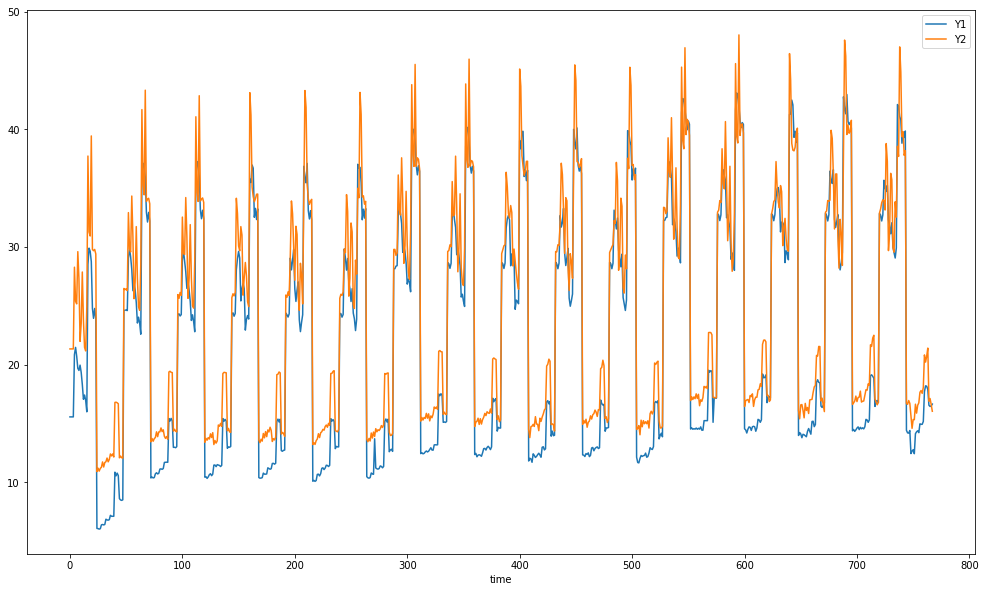

In [21]:
plt.figure(figsize=(17,10)) # зададим размер графика (17 - ширина, 10 - высота)
plt.xlabel('time') # подпись для оси X
plt.plot(df['Y1'], label='Y1') # нагрузка при обогреве
plt.plot(df['Y2'], label='Y2') # нагрузка при охлаждении
plt.legend() # отобразим легенду с вышеуказанными лейблами (справа вверху)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
df_train, df_test = df[:500], df[500:] # разобьём данные таким образом, чтобы всё до 500 пошло в train, а всё остальное - в test
clf_1, clf_2 = KNeighborsRegressor(), KNeighborsRegressor() # зададим два необученных регрессора с параметрами по умолчанию
clf_1.fit(df_train.drop(['Y1', 'Y2'], 1), df_train['Y1']) # возьмём в качестве признаков всё кроме целевых переменных Y1 и Y2. Первый регрессов научим предсказывать Y1
clf_2.fit(df_train.drop(['Y1', 'Y2'], 1), df_train['Y2']) # ... второй регрессор обучим предсказывать Y2

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

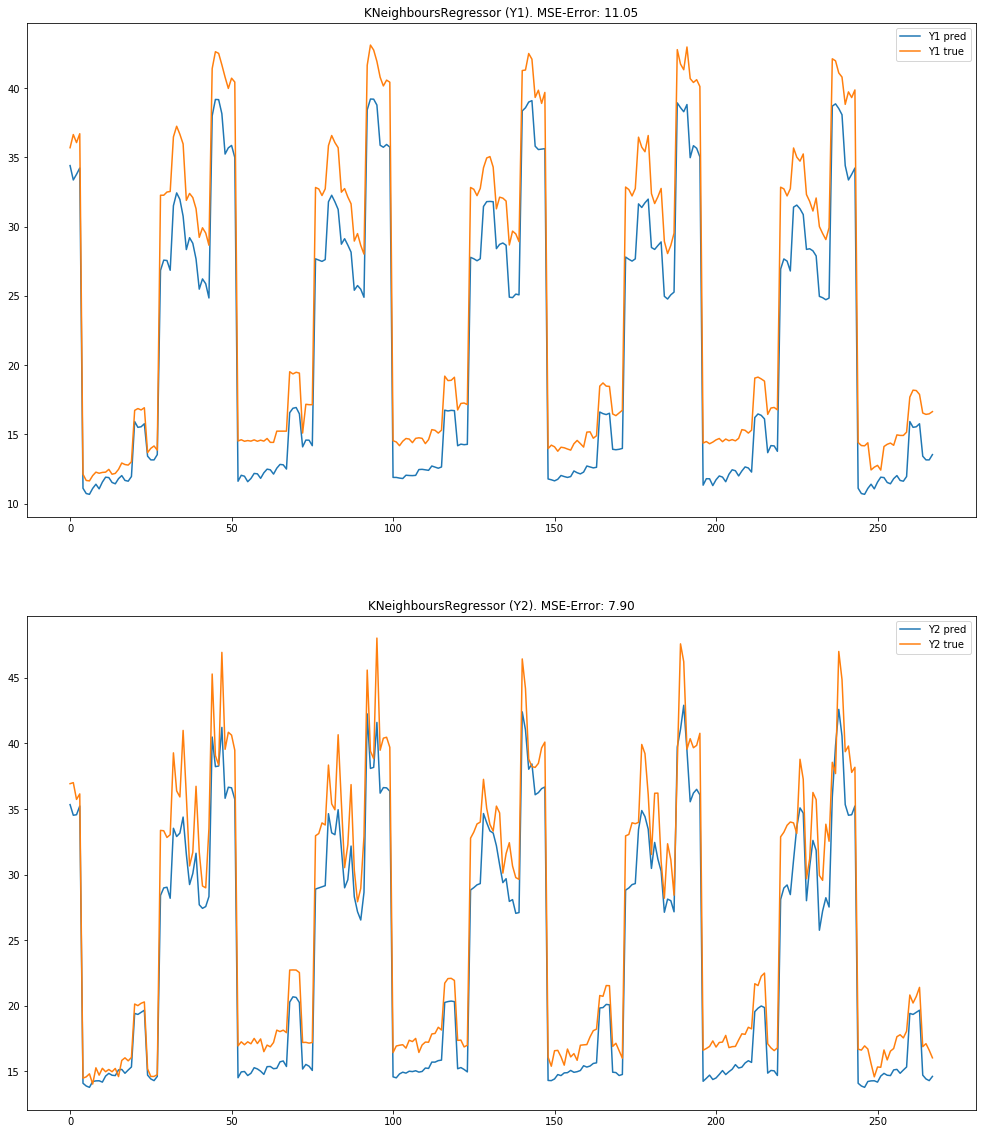

In [23]:
from sklearn.metrics import mean_squared_error

Y1_pred = clf_1.predict(df_test.drop(['Y1', 'Y2'], 1))
Y2_pred = clf_2.predict(df_test.drop(['Y1', 'Y2'], 1))
Y1_true = df_test['Y1'].values
Y2_true = df_test['Y2'].values

error_1 = mean_squared_error(Y1_pred, Y1_true)
error_2 = mean_squared_error(Y2_pred, Y2_true)

plt.figure(figsize=(17,20))
plt.subplot(211) # нарисуем сетку 2 (по высоте) X 1 (по горизонтали) и переключимся в первую ячейку
plt.title('KNeighboursRegressor (Y1). MSE-Error: %.2f' % error_1) # заголовок
plt.plot(Y1_pred, label='Y1 pred') # нарисуем предсказания для Y1 ...
plt.plot(Y1_true, label='Y1 true') # и реальные значения Y1
plt.legend()
plt.subplot(212) # нарисуем сетку 2 (по высоте) X 1 (по горизонтали) и переключимся во вторую ячейку
plt.title('KNeighboursRegressor (Y2). MSE-Error: %.2f' % error_2)
plt.plot(Y2_pred, label='Y2 pred') # нарисуем предсказания для Y2 ...
plt.plot(Y2_true, label='Y2 true') # и реальные значения Y2
plt.legend()

# Задание
Повторите то же самое для формулы Надарая-Ватсона. Проанализируйте результаты. Что на Ваш вгляд работает лучше, и почему?

In [19]:
!pip install git+https://github.com/jmetzen/kernel_regression
# установим готовую реализацию для Надарая-Ватсона

  Cloning https://github.com/jmetzen/kernel_regression to c:\users\public\documents\iskysoft\creatortemp\pip-mrz_wq-build


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


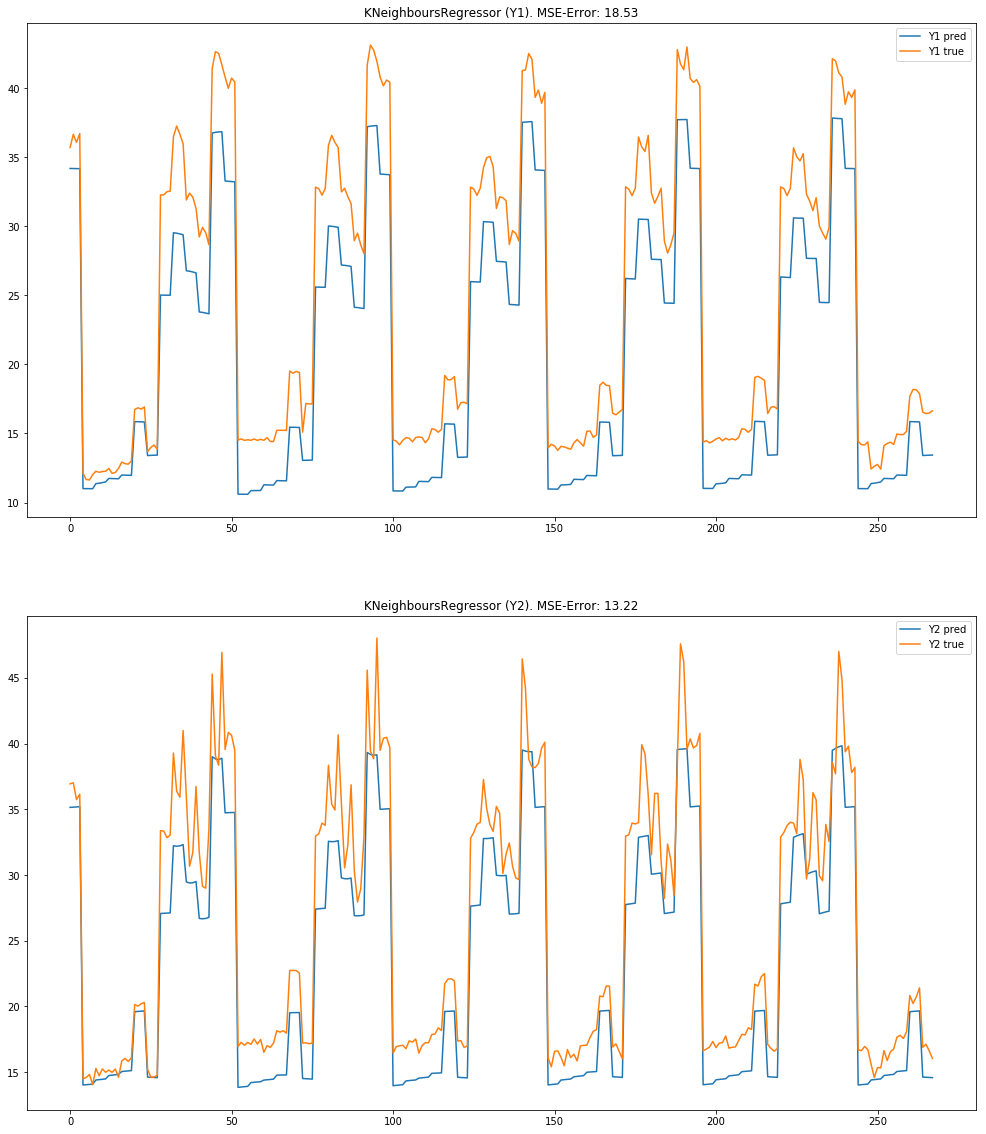

In [26]:
from kernel_regression import *
clf_1, clf_2 = KernelRegression(), KernelRegression() # зададим два необученных регрессора с параметрами по умолчанию
clf_1.fit(df_train.drop(['Y1', 'Y2'], 1), df_train['Y1']) # возьмём в качестве признаков всё кроме целевых переменных Y1 и Y2. Первый регрессов научим предсказывать Y1
clf_2.fit(df_train.drop(['Y1', 'Y2'], 1), df_train['Y2']) # ... второй регрессор обучим предсказывать Y2
from sklearn.metrics import mean_squared_error

Y1_pred = clf_1.predict(df_test.drop(['Y1', 'Y2'], 1))
Y2_pred = clf_2.predict(df_test.drop(['Y1', 'Y2'], 1))
Y1_true = df_test['Y1'].values
Y2_true = df_test['Y2'].values

error_1 = mean_squared_error(Y1_pred, Y1_true)
error_2 = mean_squared_error(Y2_pred, Y2_true)

plt.figure(figsize=(17,20))
plt.subplot(211) # нарисуем сетку 2 (по высоте) X 1 (по горизонтали) и переключимся в первую ячейку
plt.title('KNeighboursRegressor (Y1). MSE-Error: %.2f' % error_1) # заголовок
plt.plot(Y1_pred, label='Y1 pred') # нарисуем предсказания для Y1 ...
plt.plot(Y1_true, label='Y1 true') # и реальные значения Y1
plt.legend()
plt.subplot(212) # нарисуем сетку 2 (по высоте) X 1 (по горизонтали) и переключимся во вторую ячейку
plt.title('KNeighboursRegressor (Y2). MSE-Error: %.2f' % error_2)
plt.plot(Y2_pred, label='Y2 pred') # нарисуем предсказания для Y2 ...
plt.plot(Y2_true, label='Y2 true') # и реальные значения Y2
plt.legend()

Надарай-Ватсон работает хуже =(

# Полезные ссылки
* [Пример](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) с Iris и KNN
* [Пример](https://habrahabr.ru/post/206306/) решения задачи регрессии